<a href="https://colab.research.google.com/github/FreeRikato/NLP/blob/master/Week-4/Discourse_Integration_%26_Hobbs'_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Discourse Markers Found:
however (contrastive)
Furthermore (elaborative)
Thus (inferential)


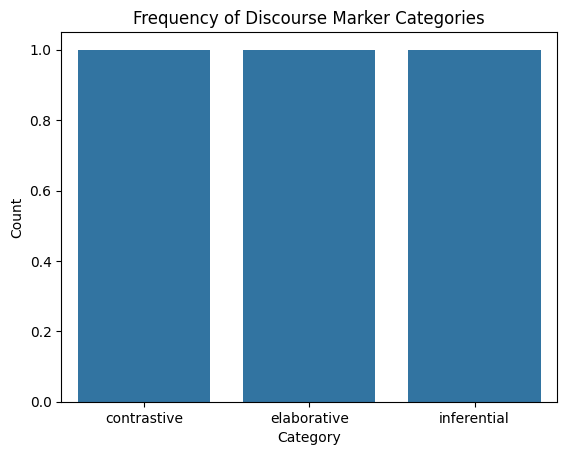

In [4]:
# Import necessary libraries
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load spaCy's pre-trained English model
nlp = spacy.load("en_core_web_sm")

# Define a function to identify discourse markers
def identify_discourse_markers(text):
    # List of common discourse markers
    discourse_markers = {
        "contrastive": ["but", "however", "although", "yet", "nevertheless"],
        "elaborative": ["and", "also", "furthermore", "moreover", "in addition"],
        "inferential": ["so", "therefore", "thus", "hence", "consequently"]
    }

    # Process the text
    doc = nlp(text)

    # Identify discourse markers in the text
    markers_found = []
    for token in doc:
        for category, markers in discourse_markers.items():
            if token.text.lower() in markers:
                markers_found.append((token.text, category))

    return markers_found

# Example text for analysis
text = """
The project was a success; however, we need to consider the budget constraints.
Furthermore, the team should focus on improving the design.
Thus, the next phase will require more resources.
"""

# Identify discourse markers in the example text
markers_found = identify_discourse_markers(text)

# Print the identified discourse markers
print("Discourse Markers Found:")
for marker, category in markers_found:
    print(f"{marker} ({category})")

# Visualize the frequency of discourse marker categories
categories = [category for _, category in markers_found]
category_counts = Counter(categories)

# Plot the frequency of discourse marker categories using seaborn
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.title("Frequency of Discourse Marker Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


Pronoun: She, Antecedent: She, Status: Antecedent found.


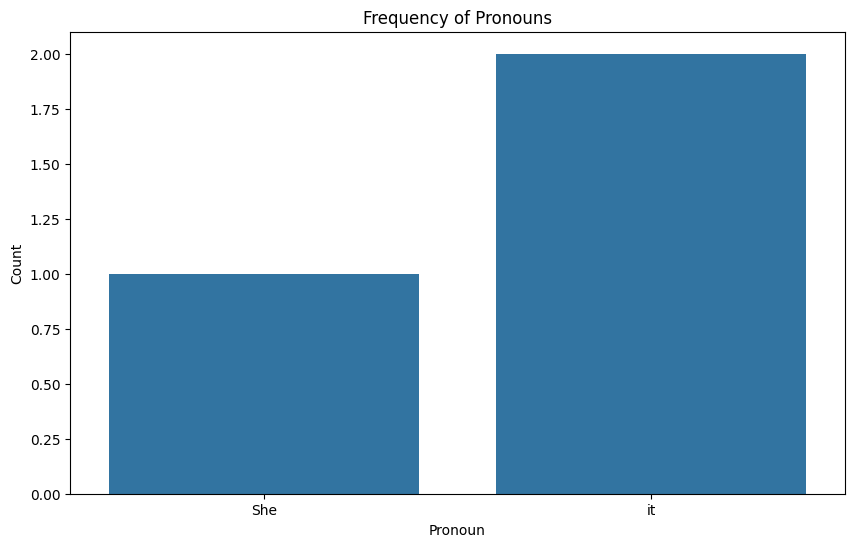

In [5]:
# Import necessary libraries
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

# Load spaCy's pre-trained English model
nlp = spacy.load("en_core_web_sm")

# Define a function to implement Hobbs' Algorithm for pronoun resolution
def hobbs_algorithm(text, pronoun):
    # Parse the text to create a syntactic tree
    doc = nlp(text)
    pronoun_node = None

    # Locate the pronoun in the parse tree
    for token in doc:
        if token.text.lower() == pronoun.lower():
            pronoun_node = token
            break

    if not pronoun_node:
        return None, "Pronoun not found."

    # Search for antecedent
    current_node = pronoun_node
    while current_node:
        # Traverse upwards to find the nearest NP or S node
        if current_node.dep_ in ('nsubj', 'nsubjpass', 'dobj', 'pobj', 'np'):
            # Return the antecedent
            antecedent = current_node.text
            return antecedent, "Antecedent found."
        current_node = current_node.head

    return None, "No antecedent found."

# Example usage
text = "Alice saw Bob. She waved at him."
pronoun = "She"
antecedent, status = hobbs_algorithm(text, pronoun)
print(f"Pronoun: {pronoun}, Antecedent: {antecedent}, Status: {status}")

# Visualize the parse tree using spaCy's displaCy
doc = nlp(text)
displacy.render(doc, style='dep', options={'distance': 100}, jupyter=True)

# Visualizing the frequency of pronouns and their resolved antecedents using seaborn
def visualize_pronoun_resolution(pronouns, antecedents):
    pronoun_counts = Counter(pronouns)
    antecedent_counts = Counter(antecedents)

    # Create a DataFrame for visualization
    df = pd.DataFrame({
        'Pronoun': list(pronoun_counts.keys()),
        'Frequency': list(pronoun_counts.values())
    })

    # Plot the frequency of pronouns using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Pronoun', y='Frequency', data=df)
    plt.title('Frequency of Pronouns')
    plt.xlabel('Pronoun')
    plt.ylabel('Count')
    plt.show()

# Example sentences for plotting
example_sentences = [
    "Alice saw Bob. She waved at him.",
    "The dog barked. It ran into the house.",
    "The cat sat on the mat. It was very comfortable."
]

pronouns = ["She", "it", "it"]
antecedents = ["Alice", "the dog", "the cat"]

visualize_pronoun_resolution(pronouns, antecedents)
